In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


Using TensorFlow backend.
/home/akash/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/akash/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/akash/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/akash/.local/lib/python3.6/site-packages/tensorflow/python/fra

In [2]:
df = pd.read_csv('NCDEX_data.csv')
df.head()

,Date,Close_Price
0,2-Jan-17,3068
1,3-Jan-17,3042
2,4-Jan-17,3018
3,5-Jan-17,3027
4,6-Jan-17,3028


In [3]:
df.Date = pd.to_datetime(df.Date)
df = df.set_index("Date")
df.head()

,Close_Price
Date,
2017-01-02,3068
2017-01-03,3042
2017-01-04,3018
2017-01-05,3027
2017-01-06,3028


In [4]:
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]

In [5]:
train_data

,Close_Price
Date,
2017-01-02,3068
2017-01-03,3042
2017-01-04,3018
2017-01-05,3027
2017-01-06,3028
...,...
2019-12-02,4138
2019-12-03,4134
2019-12-04,4136


In [6]:
test_data

,Close_Price
Date,
2019-12-09,4184
2019-12-10,4188
2019-12-11,4198
2019-12-12,4266
2019-12-13,4208
2019-12-16,4242
2019-12-17,4296
2019-12-18,4294
2019-12-19,4344


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [8]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 27
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [9]:
lstm_model.fit_generator(generator,epochs=20)

W0103 16:44:23.257197 140599057135424 deprecation_wrapper.py:119] From /home/akash/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Epoch 1/20
636/636 [==============================] - 12s 20ms/step - loss: 0.0124
Epoch 2/20
636/636 [==============================] - 11s 17ms/step - loss: 0.0021
Epoch 3/20
636/636 [==============================] - 11s 17ms/step - loss: 0.0022
Epoch 4/20
636/636 [==============================] - 12s 19ms/step - loss: 0.0018
Epoch 5/20
636/636 [==============================] - 10s 16ms/step - loss: 0.0019
Epoch 6/20
636/636 [==============================] - 11s 18ms/step - loss: 0.0019
Epoch 7/20
636/636 [==============================] - 11s 17ms/step - loss: 0.0018
Epoch 8/20
636/636 [==============================] - 10s 16ms/step - loss: 0.0018
Epoch 9/20
636/636 [==============================] - 11s 18ms/step - loss: 0.0016
Epoch 10/20
636/636 [==============================] - 11s 17ms/step - loss: 0.0016
Epoch 11/20
636/636 [==============================] - 11s 17ms/step - loss: 0.0017
Epoch 12/20
636/636 [==============================] - 11s 18ms/step - loss: 0.0016
E

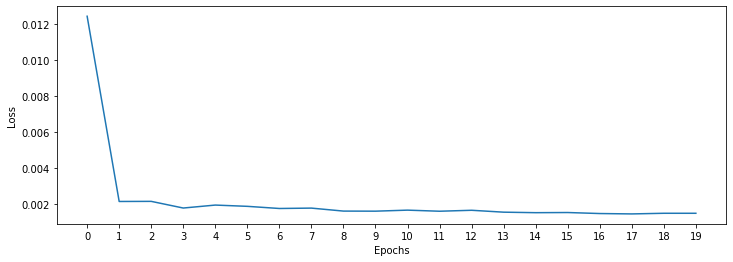

In [10]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);
plt.show()

In [11]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [12]:
lstm_predictions_scaled

[array([0.99172795], dtype=float32),
 array([0.9908316], dtype=float32),
 array([0.990142], dtype=float32),
 array([0.9893422], dtype=float32),
 array([0.98843336], dtype=float32),
 array([0.9874176], dtype=float32),
 array([0.9863105], dtype=float32),
 array([0.9851283], dtype=float32),
 array([0.98387694], dtype=float32),
 array([0.98256016], dtype=float32),
 array([0.9811876], dtype=float32),
 array([0.9797652], dtype=float32)]

In [13]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)


In [14]:
lstm_predictions

array([[4113.68752909],
       [4109.96953297],
       [4107.1089654 ],
       [4103.79149818],
       [4100.02158165],
       [4095.80811644],
       [4091.21587944],
       [4086.31211996],
       [4081.121562  ],
       [4075.65953445],
       [4069.9660902 ],
       [4064.06595325]])

In [15]:
test_data['LSTM_Predictions'] = lstm_predictions
test_data

/home/akash/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Close_Price,LSTM_Predictions
Date,,
2019-12-09,4184,4113.687529
2019-12-10,4188,4109.969533
2019-12-11,4198,4107.108965
2019-12-12,4266,4103.791498
2019-12-13,4208,4100.021582
2019-12-16,4242,4095.808116
2019-12-17,4296,4091.215879
2019-12-18,4294,4086.312120
2019-12-19,4344,4081.121562


In [17]:
#prophet
df_pr = df.copy()
df_pr = df.reset_index()
df_pr.columns = ['ds','y'] # To use prophet column names should be like that
train_data_pr = df_pr.iloc[:len(df)-12]
test_data_pr = df_pr.iloc[len(df)-12:]
from fbprophet import Prophet
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=27,freq='MS')
prophet_pred = m.predict(future)
prophet_pred.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
685,2021-11-01,6424.434512,5111.043731,7061.543982,5502.221953,7374.218492,-323.684444,-323.684444,-323.684444,-4.968840,-4.968840,-4.968840,-318.715604,-318.715604,-318.715604,0.0,0.0,0.0,6100.750069
686,2021-12-01,6520.175942,5301.740412,7405.706232,5529.378460,7541.081408,-152.159710,-152.159710,-152.159710,-3.032420,-3.032420,-3.032420,-149.127290,-149.127290,-149.127290,0.0,0.0,0.0,6368.016232
687,2022-01-01,6619.108752,5613.764597,7796.679537,5558.296792,7702.550189,77.203794,77.203794,77.203794,140.055785,140.055785,140.055785,-62.851991,-62.851991,-62.851991,0.0,0.0,0.0,6696.312546
688,2022-02-01,6718.041562,5834.570629,8154.707058,5592.238459,7879.747317,271.947861,271.947861,271.947861,-29.648218,-29.648218,-29.648218,301.596079,301.596079,301.596079,0.0,0.0,0.0,6989.989423
689,2022-03-01,6807.400230,5801.487020,8217.920178,5607.827654,8038.639871,210.869881,210.869881,210.869881,-29.648218,-29.648218,-29.648218,240.518099,240.518099,240.518099,0.0,0.0,0.0,7018.270110


In [18]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-12:]['ds'], "Pred" : prophet_pred[-12:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "MS"
prophet_pred

,Pred
Date,
2021-04-01,5987.234749
2021-05-01,6143.969430
2021-06-01,5927.529883
2021-07-01,6042.991853
2021-08-01,5957.991492
2021-09-01,6014.659699
2021-10-01,6170.403672
2021-11-01,6100.750069
2021-12-01,6368.016232


In [19]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values


/home/akash/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
test_data

,Close_Price,LSTM_Predictions,Prophet_Predictions
Date,,,
2019-12-09,4184,4113.687529,5987.234749
2019-12-10,4188,4109.969533,6143.969430
2019-12-11,4198,4107.108965,5927.529883
2019-12-12,4266,4103.791498,6042.991853
2019-12-13,4208,4100.021582,5957.991492
2019-12-16,4242,4095.808116,6014.659699
2019-12-17,4296,4091.215879,6170.403672
2019-12-18,4294,4086.312120,6100.750069
2019-12-19,4344,4081.121562,6368.016232


In [2]:
from pmdarima import auto_arima 
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima    
from datetime import datetime
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse


In [21]:
auto_arima(df['Modal Price (Rs./Quintal)'], seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

/home/akash/.local/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/akash/.local/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/home/akash/.local/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/akash/.local/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/akash/.local/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  596
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -3621.573
Date:                Fri, 27 Dec 2019   AIC                           7249.145
Time:                        18:15:15   BIC                           7262.311
Sample:                             0   HQIC                          7254.272
                                - 596                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.5147      1.831      0.827      0.408      -2.073       5.103
ma.L1         -0.6756      0.013    -53.648      0.000      -0.700      -0.651
sigma2      1.132e+04    153.082     73.955      0.000     1.1e+04    1.16e+04
===================================================================================
Ljung-Box (Q):                       35.47   Jarque-Bera (JB):             82989.16
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                            -4.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        60.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]
model = ARIMA(df['Close_Price'][:675], order=(0,1,1)) 

/home/akash/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/akash/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [29]:
results = model.fit()

In [34]:
predictions_arima=results.forecast(steps=120)[0]

In [35]:
predictions_arima

array([4356.77024617, 4358.734685  , 4360.69912384, 4362.66356268,
       4364.62800151, 4366.59244035, 4368.55687919, 4370.52131802,
       4372.48575686, 4374.45019569, 4376.41463453, 4378.37907337,
       4380.3435122 , 4382.30795104, 4384.27238988, 4386.23682871,
       4388.20126755, 4390.16570638, 4392.13014522, 4394.09458406,
       4396.05902289, 4398.02346173, 4399.98790056, 4401.9523394 ,
       4403.91677824, 4405.88121707, 4407.84565591, 4409.81009475,
       4411.77453358, 4413.73897242, 4415.70341125, 4417.66785009,
       4419.63228893, 4421.59672776, 4423.5611666 , 4425.52560544,
       4427.49004427, 4429.45448311, 4431.41892194, 4433.38336078,
       4435.34779962, 4437.31223845, 4439.27667729, 4441.24111613,
       4443.20555496, 4445.1699938 , 4447.13443263, 4449.09887147,
       4451.06331031, 4453.02774914, 4454.99218798, 4456.95662682,
       4458.92106565, 4460.88550449, 4462.84994332, 4464.81438216,
       4466.778821  , 4468.74325983, 4470.70769867, 4472.67213

In [27]:
df.head()

,Close_Price
Date,
2017-01-02,3068
2017-01-03,3042
2017-01-04,3018
2017-01-05,3027
2017-01-06,3028
